# **In this Assignment you will perform sentiment analysis on twitter's dataset using Logistic Regression**

In [1]:
#!pip install numpy pandas re nltk matplotlib sklearn textblob pylab scikit-learn

In [2]:
!pip install -U textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [3]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from wordcloud import WordCloud,STOPWORDS
nltk.download("stopwords")
stopwords_set = set(stopwords.words("english"))
%matplotlib inline
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Load Tweet dataset download from https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset**

In [4]:
#fill code
df =pd.read_csv("https://raw.githubusercontent.com/dudegladiator/QuantClub/main/Twitter_Data.csv")

#Output the first five rows
df.head(5)
#fill code

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<Axes: xlabel='category'>

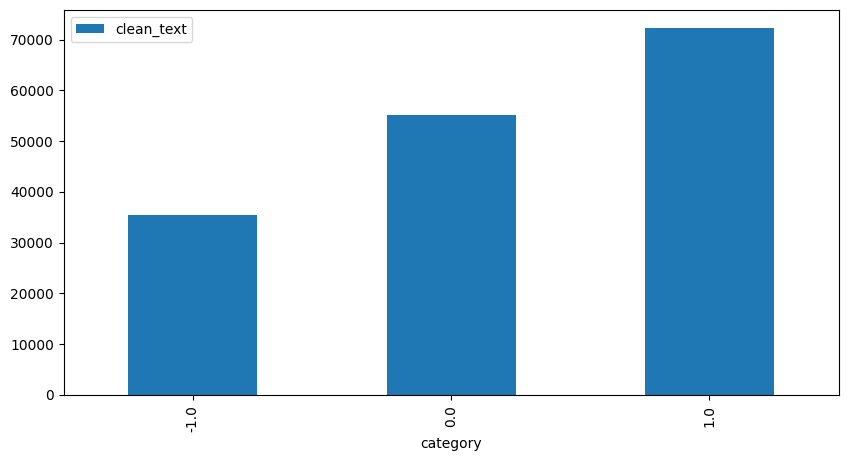

In [5]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [6]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

In [7]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


# **Visualizing data into wordclouds**

In [8]:
from wordcloud import WordCloud, STOPWORDS

#write code to generate the worldcloud

def wordcount_gen(df, category,color):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    #fill code
    if(category == 'Positive'):
        df = df[df['category'] == 'Positive']
    elif(category == 'Negative'):
        df = df[df['category'] == 'Negative']
    elif(category == 'Neutral'):
        df = df[df['category'] == 'Neutral']
    else:
        print('Invalid category')
    words = ' '.join(df['clean_text'].astype(str))
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and word != 'RT'
                            ])

    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()




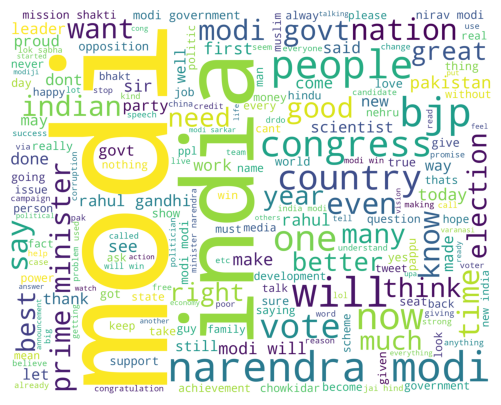

In [9]:
#Generate Positive tweet words cloud
wordcount_gen(df, 'Positive', 'white')
#fill code

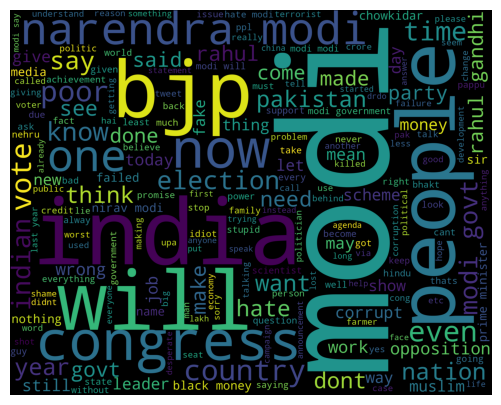

In [10]:
#Generate Negative tweet words cloud
wordcount_gen(df, 'Negative', 'black')
#fill code

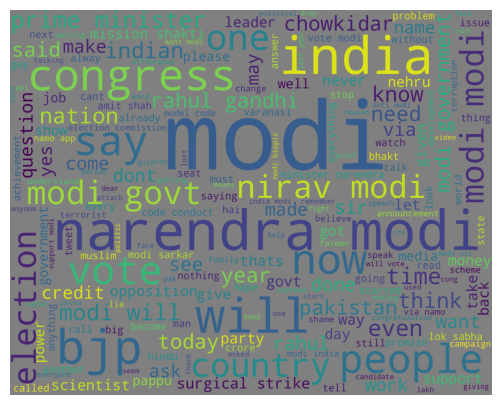

In [11]:
#Generate Neutral tweet words cloud
wordcount_gen(df, 'Neutral', 'grey')
#fill code

# **Cleaning the tweets using RegEx and NLTK**

In [12]:
stopwords_list = set(stopwords.words("english"))   #stopwords downloading from NLTK in english

# We remove negation words in list of stopwords
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)

re_negation = re.compile("n't ")
# function that receive a sequence of woords and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function that receive a list of words and do lemmatization:
def lemma_stem_text(words_list):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    return text



In [13]:
negation_abbreviated_to_standard(df['clean_text'][0])

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [14]:
#fill code to return the cleaned tweet using RegEx and NLTK
def tweet_to_words(tweet):

    ''' Convert tweet text into a sequence of words '''
    #fill code
    # 1. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(tweet)

    # 2. Remove non-letters and non-numbers
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text)   #keeping only numbers and letters

    # 3. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())

    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]

    # 5. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)

    return( " ".join(lemma_words))

    #fill code


print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state not business exit psus temple


In [15]:
df1 = {
    'clean_text':[] ,
    'category': []
}
df1 = pd.DataFrame(df1)

In [16]:
for i , j in enumerate(df['clean_text'].tolist()):
  try:
    if(type(j)== str and j != '' and len(j)>3):
      df1.loc[i] = [tweet_to_words(str(j)), df['category'][i]]
  except:
    continue

In [17]:
# Apply data processing to each tweet
from sklearn.preprocessing import LabelEncoder

# Encode target labels using scikit learn
label_encoder = LabelEncoder()

df1['category'] = label_encoder.fit_transform(df1['category'])

In [18]:
for i in range(162980):
  try:
    if(df1['category'][i]==3):
      df1['category'][i]=1
  except:
    continue

In [19]:
#train test splitting using scikit learn
X_train, X_test, y_train, y_test =  train_test_split(df1['clean_text'], df1['category'], test_size=0.2, random_state=1)

#**Train Test Split for training the Regression model**

In [20]:
#Transform the training and testing data using countvectorizer

# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hyperparameters of encoded
vectorizer = TfidfVectorizer(max_features=20000, ngram_range = (1,2))

# Create the training set with the words encoded as features of the text
train_data_features = vectorizer.fit_transform(X_train)

print(train_data_features.shape) #training data in the trainable format



(130375, 20000)


In [21]:
#train multivariate logistic regression on the data using scikit learn

# Import the logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression
# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=1000)
# Train model
model.fit(train_data_features, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [22]:
#predict using your model on the testing dataset

# Create the test set with the words encoded as features of the reviews
test_data_features = vectorizer.transform(X_test)    #vectorizing the test dataset

# Use the logistic regression model to make sentiment label predictions
result = model.predict(test_data_features)   #predicting the test data set

# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
y_pred_LR = result
y_pred_LR

array([1, 2, 1, ..., 2, 0, 2])

# **Analysing the Results**

In [23]:
#Calculate and plot the Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix

array([[ 5207,   940,   951],
       [  251, 10132,   531],
       [  667,  1237, 12678]])

Text(0.5, 445.55555555555554, 'Predicted label')

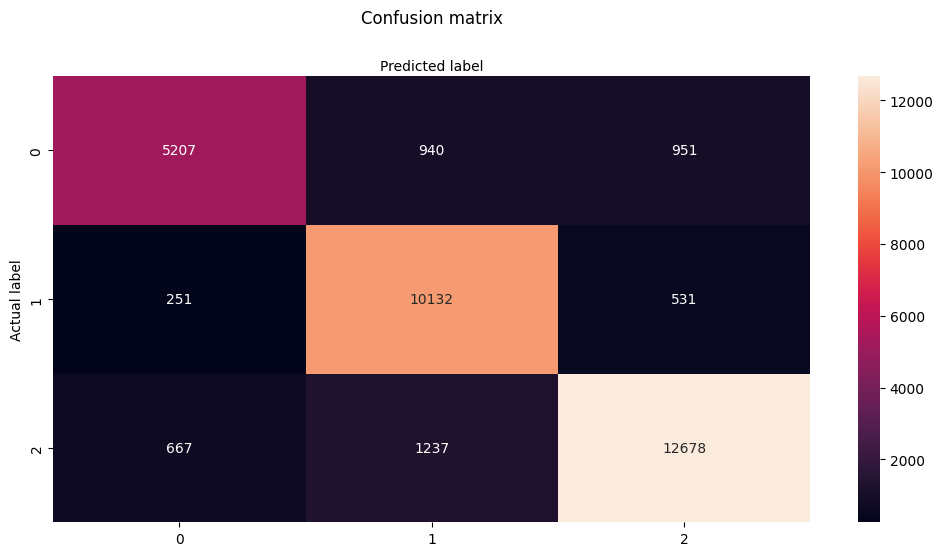

In [24]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  color = 'Red'  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
#calculate the precision , recall and accuracy using scikit learn

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))
print("Precision:",metrics.precision_score(y_test, y_pred_LR,average=None))
print("Recall:",metrics.recall_score(y_test, y_pred_LR,average=None)) #overall this model gives very good accuracy of 78% which is better than both NB and TextBLob

Accuracy: 0.8595753819721421
Precision: [0.85012245 0.82313754 0.89533898]
Recall: [0.73358693 0.92834891 0.86942806]


Hope You Learnt the techniques for sentiment analysis , remember this is just the tip of the iceberg, there is alot to learn.. so keep learning... keep growing :) .